In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_wine
import sklearn.metrics as metrics

from sklearn.metrics import classification_report # 정밀도와 재현율등 정보표시

import warnings
warnings.simplefilter('ignore')

import matplotlib
matplotlib.rcParams["font.family"]="AppleGothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [2]:
### 1번 데이터 정보

'''
ID number
Diagnosis (M = malignant, B = benign) : 레이블 양성/악성
    
radius (mean of distances from center to points on the perimeter) : 혹의 모양 반지름
texture (standard deviation of gray-scale values) : 질감
perimeter : 둘레
area : 넓이
smoothness (local variation in radius lengths) : 매끄러움
compactness (perimeter^2 / area - 1.0) : 조밀성
concavity (severity of concave portions of the contour) : 오목함
concave points (number of concave portions of the contour) : 오목한 포인트
symmetry : 대칭
fractal dimension ("coastline approximation" - 1) : 프랙탈 차원
'''

'\nID number\nDiagnosis (M = malignant, B = benign) : 레이블 양성/악성\n    \nradius (mean of distances from center to points on the perimeter) : 혹의 모양 반지름\ntexture (standard deviation of gray-scale values) : 질감\nperimeter : 둘레\narea : 넓이\nsmoothness (local variation in radius lengths) : 매끄러움\ncompactness (perimeter^2 / area - 1.0) : 조밀성\nconcavity (severity of concave portions of the contour) : 오목함\nconcave points (number of concave portions of the contour) : 오목한 포인트\nsymmetry : 대칭\nfractal dimension ("coastline approximation" - 1) : 프랙탈 차원\n'

In [3]:
### 2번 데이터 정보
'''
타겟 데이터
와인의 종류 0, 1, 2의 세가지 값
특징 데이터
알콜(Alcohol)
말산(Malic acid)
회분(Ash)
회분의 알칼리도(Alcalinity of ash)
마그네슘(Magnesium)
총 폴리페놀(Total phenols)
플라보노이드 폴리페놀(Flavanoids)
비 플라보노이드 폴리페놀(Nonflavanoid phenols)
프로안토시아닌(Proanthocyanins)
색상의 강도(Color intensity)
색상(Hue)
희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
프롤린(Proline)
'''

'\n타겟 데이터\n와인의 종류 0, 1, 2의 세가지 값\n특징 데이터\n알콜(Alcohol)\n말산(Malic acid)\n회분(Ash)\n회분의 알칼리도(Alcalinity of ash)\n마그네슘(Magnesium)\n총 폴리페놀(Total phenols)\n플라보노이드 폴리페놀(Flavanoids)\n비 플라보노이드 폴리페놀(Nonflavanoid phenols)\n프로안토시아닌(Proanthocyanins)\n색상의 강도(Color intensity)\n색상(Hue)\n희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)\n프롤린(Proline)\n'

## 1. 데이터 불러오기

In [4]:
wine = load_wine()

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 1-1 데이터 프레임 만들기

In [6]:
wine_df = pd.DataFrame( wine.data)
wine_df.columns = wine['feature_names']
wine_df['target_names'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 1-2 데이터 셋 나누기

In [7]:
x_data = wine_df.iloc[:,:-1]
y_data = wine_df.iloc[:,-1]

print(x_data.shape, y_data.shape)

(178, 13) (178,)


## 다중공선성 확인

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_data.values, i) 
                        for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,206.189057,alcohol
1,8.925541,malic_acid
2,165.640370,ash
3,73.141564,alcalinity_of_ash
4,67.364868,magnesium
5,62.786935,total_phenols
6,35.535602,flavanoids
7,16.636708,nonflavanoid_phenols
8,17.115665,proanthocyanins
9,17.022272,color_intensity


### 다중공선성이 높은 컬럼 제거


가장 높은 2개의 컬럼 제거
- 1차 : alcohol, ash


In [10]:
# vif 값이 높은 Latitude, Longitude 제거
x_data_1 = x_data.drop(['alcohol', 'ash'], axis=1)

In [11]:
vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_data_1.values, i) 
                        for i in range(x_data_1.shape[1])]
vif['features'] = x_data_1.columns
vif

,VIF Factor,features
0,7.795161,malic_acid
1,42.624022,alcalinity_of_ash
2,52.199481,magnesium
3,61.748140,total_phenols
4,32.553015,flavanoids
5,14.564136,nonflavanoid_phenols
6,16.160265,proanthocyanins
7,12.246397,color_intensity
8,37.081271,hue
9,46.564609,od280/od315_of_diluted_wines


와인 성분 검색 결과 마그네슘과 폴리페놀은 비슷한 수치여서 제거
- 2차 : magnesium, total_phenols

In [12]:
# vif 값이 높은 Latitude, Longitude 제거
x_data_2 = x_data_1.drop(['magnesium', 'total_phenols'], axis=1)

In [13]:
vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_data_2.values, i) 
                        for i in range(x_data_2.shape[1])]
vif['features'] = x_data_2.columns
vif

,VIF Factor,features
0,7.585991,malic_acid
1,36.100757,alcalinity_of_ash
2,21.676987,flavanoids
3,14.203190,nonflavanoid_phenols
4,15.587533,proanthocyanins
5,10.833714,color_intensity
6,32.862883,hue
7,43.345673,od280/od315_of_diluted_wines
8,13.718665,proline


## train, test 데이터 나누기

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x_data_2, y_data, test_size=0.2, random_state=1, stratify = y_data)
print(x_train.shape,x_test.shape)

(142, 9) (36, 9)


## 2. 모델 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### 2-1 Logistic

In [16]:
estimators = [('scaler',StandardScaler()),
              ('logi',LogisticRegression(multi_class='multinomial'))]

pipe = Pipeline(estimators)              

param = {'logi__penalty':['l2', 'l1', 'elasticnet'],
         'logi__C':[i for i in np.linspace(0,10,10)],
         'logi__solver':['newton-cg','liblinear','lbfgs','sag','saga']}

gridLogi = GridSearchCV(pipe, param_grid=param, verbose=1)
gridLogi.fit(x_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   25.6s finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logi',
                                        LogisticRegression(multi_class='multinomial'))]),
             param_grid={'logi__C': [0.0, 1.1111111111111112,
                                     2.2222222222222223, 3.3333333333333335,
                                     4.444444444444445, 5.555555555555555,
                                     6.666666666666667, 7.777777777777779,
                                     8.88888888888889, 10.0],
                         'logi__penalty': ['l2', 'l1', 'elasticnet'],
                         'logi__solver': ['newton-cg', 'liblinear', 'lbfgs',
                                          'sag', 'saga']},
             verbose=1)

In [17]:
print('best_estimator의 평균 교차 검증 점수:', gridLogi.best_score_)
print('최상의 결과를 제공한 매개변수:', gridLogi.best_params_)
print('best_estimator:', gridLogi.best_estimator_)

best_estimator의 평균 교차 검증 점수: 0.9576354679802955
최상의 결과를 제공한 매개변수: {'logi__C': 2.2222222222222223, 'logi__penalty': 'l2', 'logi__solver': 'newton-cg'}
best_estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('logi',
                 LogisticRegression(C=2.2222222222222223,
                                    multi_class='multinomial',
                                    solver='newton-cg'))])


### 2-2 KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier          

In [19]:
estimators = [('scaler',StandardScaler()),
              ('KNN',KNeighborsClassifier())]

pipe = Pipeline(estimators)              

param = {'KNN__n_neighbors':[i for i in range(0,15)]}

# 교차 검증도 해줌
gridKNN = GridSearchCV(pipe, param_grid = param)
gridKNN.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14]})

In [20]:
print('best_estimator의 평균 교차 검증 점수:', gridKNN.best_score_)
print('최상의 결과를 제공한 매개변수:', gridKNN.best_params_)
print('best_estimator:', gridKNN.best_estimator_)

best_estimator의 평균 교차 검증 점수: 0.9502463054187194
최상의 결과를 제공한 매개변수: {'KNN__n_neighbors': 5}
best_estimator: Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])


## 3. 그래프 그리기

### 3-1.1 logi_fusion matrix 


In [32]:
y_pred1 = gridLogi.predict(x_test)

In [33]:
cm = metrics.confusion_matrix(y_test, y_pred)

### 3-2.1 logi_heatmap


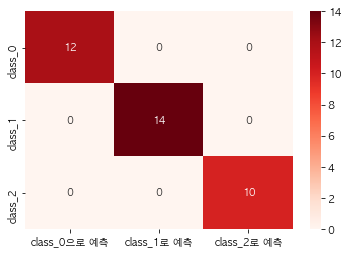

In [23]:
sns.heatmap(cm, annot=True, cmap='Reds',
            xticklabels=['class_0으로 예측','class_1로 예측', 'class_2로 예측'],
            yticklabels = wine.target_names)
plt.show()

### 3-3.1 logi_pairplot

In [24]:
# 컬럼제거 적용한 데이터프레임 만들기
wine_df1=wine_df.drop(['alcohol', 'ash','magnesium', 'total_phenols'], axis=1)

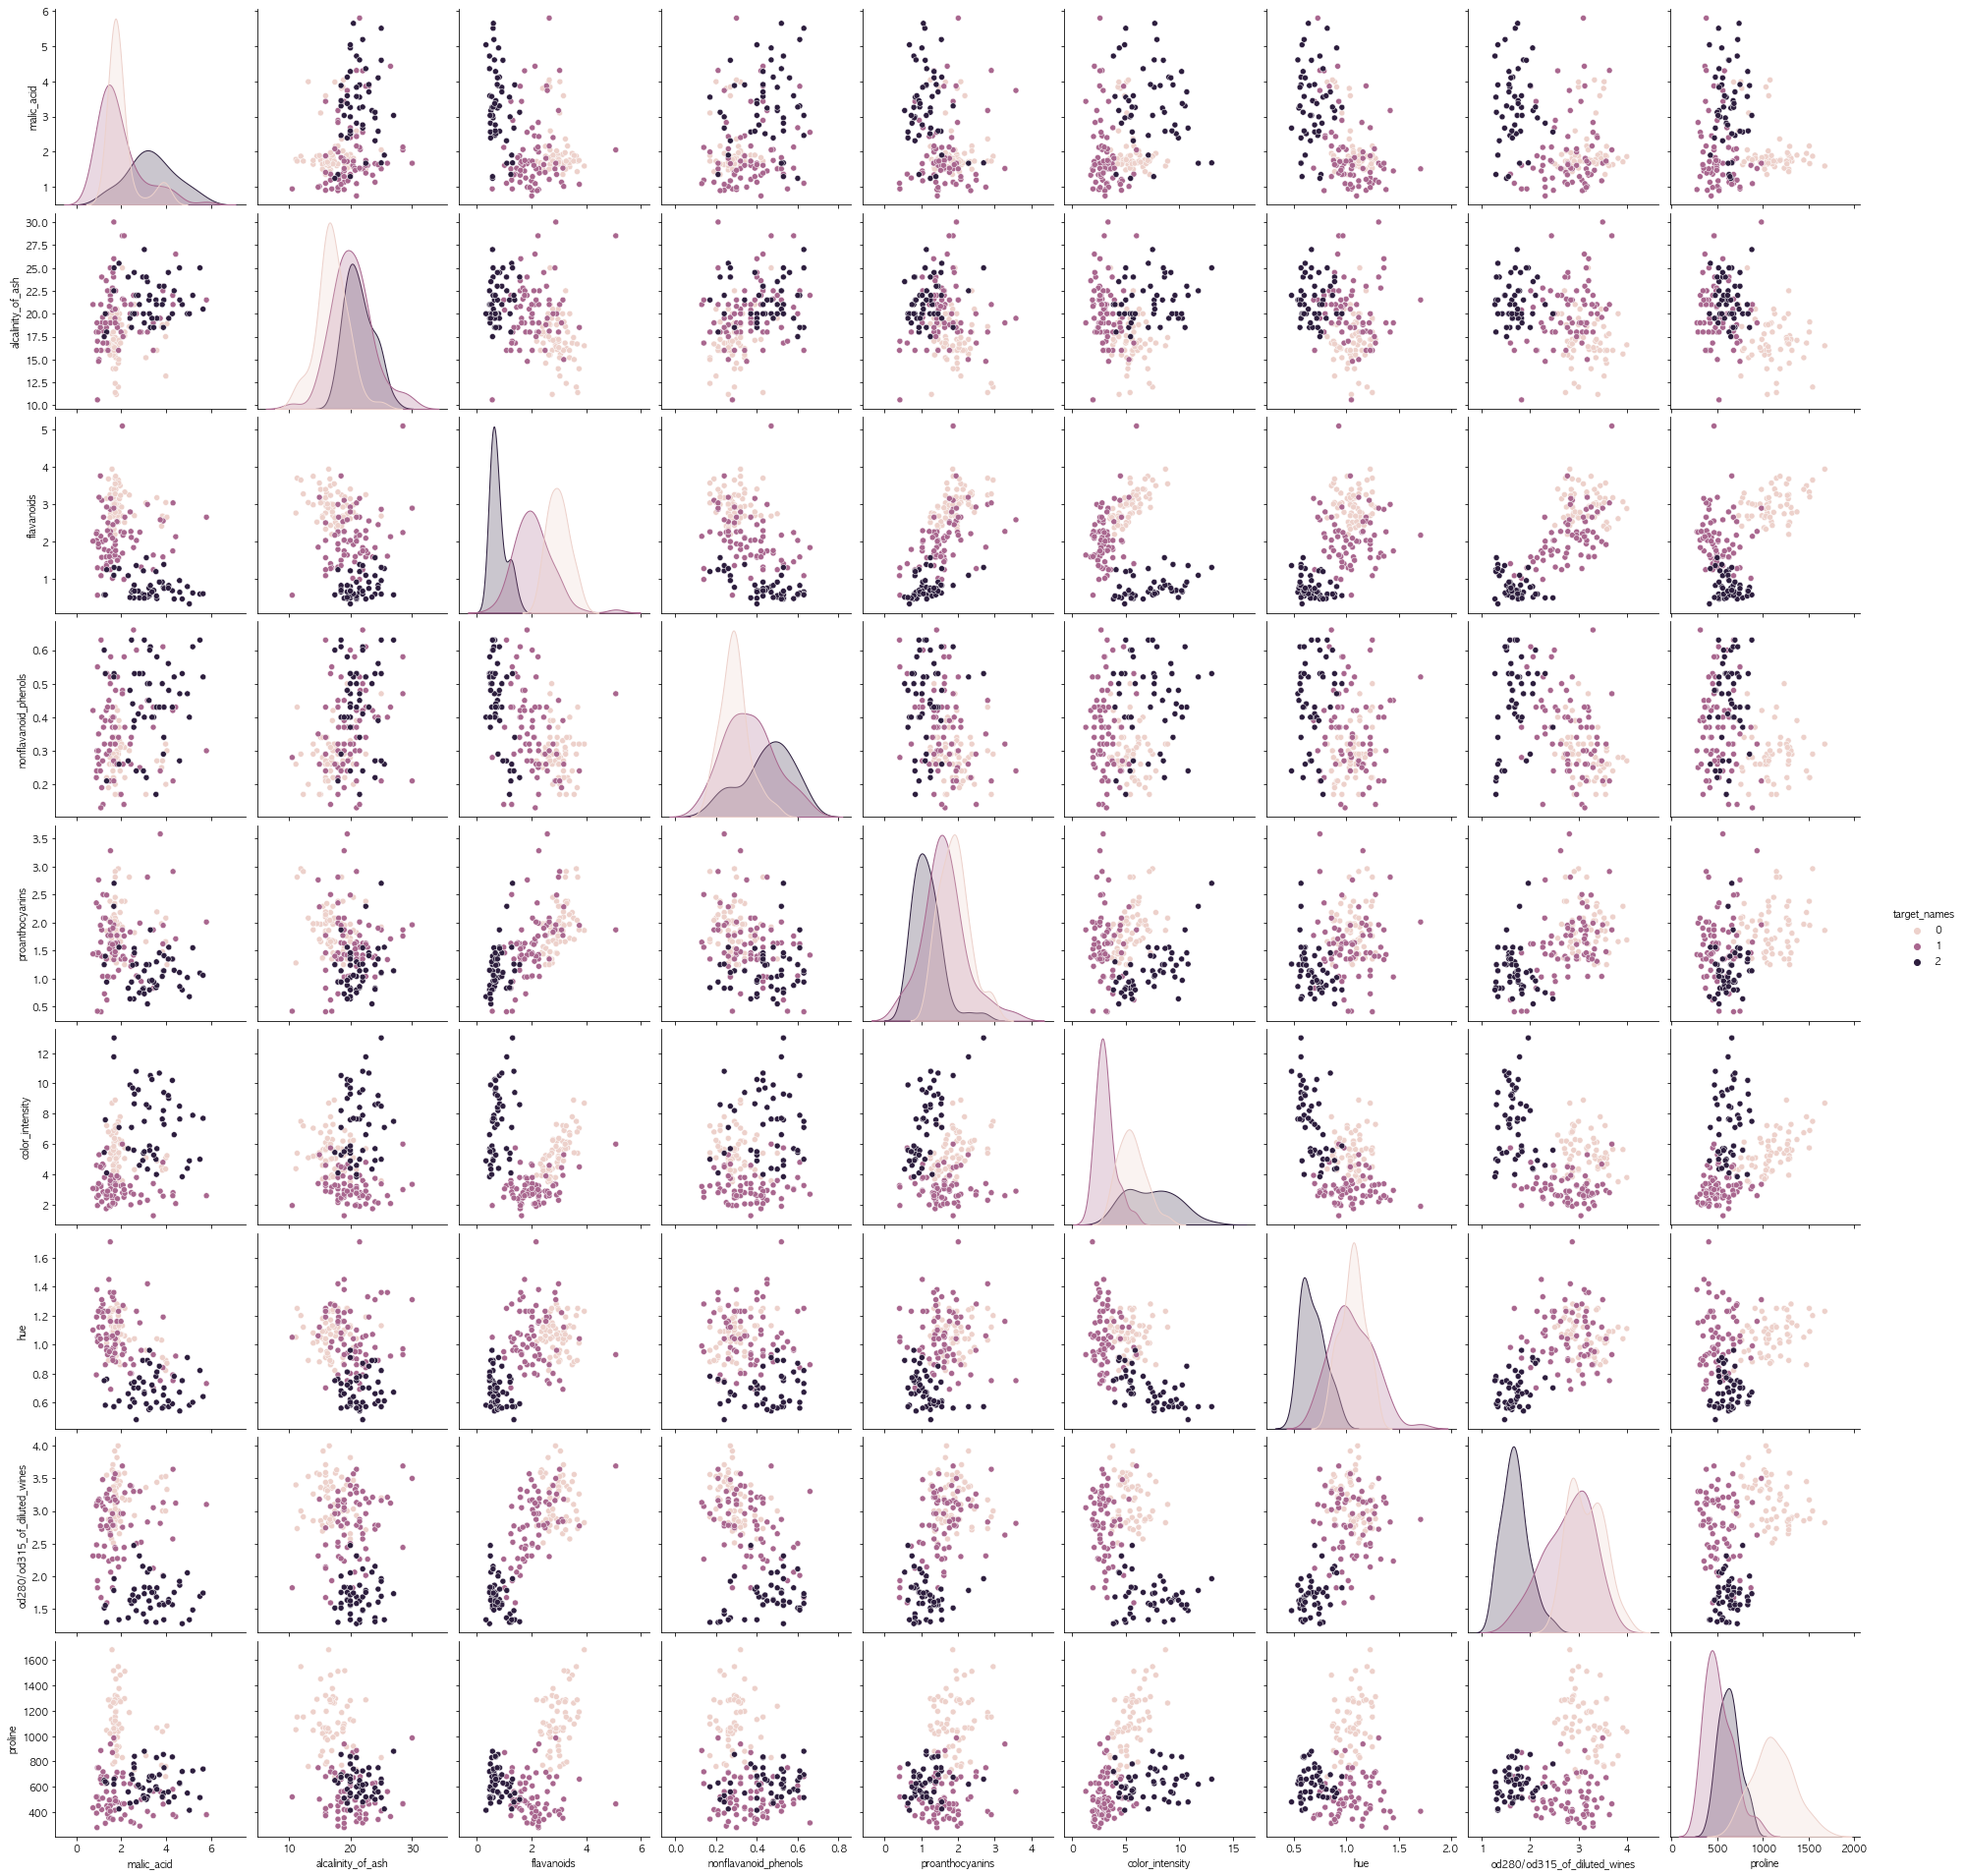

In [25]:
sns.pairplot(data=wine_df1, hue='target_names',size=3)
plt.show()

### 3-3.2 KNN_fusion matrix

In [34]:
y_pred2 = gridKNN.predict(x_test)

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred)

### 3-2.1 KNN_heatmap

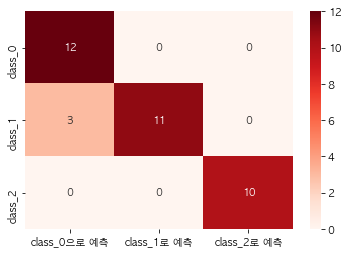

In [31]:
sns.heatmap(cm, annot=True, cmap='Reds',
            xticklabels=['class_0으로 예측','class_1로 예측', 'class_2로 예측'],
            yticklabels = wine.target_names)
plt.show()

## 4. 정확도 비교

In [41]:
# precision, sensitivity, f1 score 
print('logi_정확도: ',gridLogi.best_score_)
print('logi_정밀도: ',metrics.precision_score( y_test, y_pred1 , average='macro'))
print('logi_재현율: ',metrics.recall_score( y_test, y_pred1 , average='macro'))
print('logi_F1 score: ',metrics.f1_score( y_test, y_pred1, average='macro'))

print('-'*30)
print('KNN_정확도: ',gridKNN.best_score_)
print('KNN_정밀도: ',metrics.precision_score( y_test, y_pred2 , average='macro'))
print('KNN_재현율: ',metrics.recall_score( y_test, y_pred2 , average='macro'))
print('KNN_F1_score: ',metrics.f1_score( y_test, y_pred2, average='macro'))

logi_정확도:  0.9576354679802955
logi_정밀도:  1.0
logi_재현율:  1.0
logi_F1 score:  1.0
------------------------------
KNN_정확도:  0.9502463054187194
KNN_정밀도:  0.9333333333333332
KNN_재현율:  0.9285714285714285
KNN_F1_score:  0.9229629629629631
